In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# __Task 1__

О каждой из них мы знаем:

-сколько детей она родила (признак ceb)

-возраст (age)

-длительность получения образования (educ)

-религиозная принадлежность (religion)

-идеальное, по её мнению, количество детей в семье (idlnchld)

-была ли она когда-нибудь замужем (evermarr)

-возраст первого замужества (agefm)

-длительность получения образования мужем (heduc)

-знает ли она о методах контрацепции (knowmeth)

-использует ли она методы контрацепции (usemeth)

-живёт ли она в городе (urban)

-есть ли у неё электричество, радио, телевизор и велосипед (electric, radio, tv, bicycle)

__Давайте научимся оценивать количество детей ceb по остальным признакам.
Загрузите данные и внимательно изучите их. Сколько разных значений принимает признак religion?__

In [127]:
df = pd.read_csv("botswana.tsv", delimiter="\t")

In [128]:
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4357,2,28,7,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4358,4,24,5,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4361 entries, 0 to 4360
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ceb       4361 non-null   int64  
 1   age       4361 non-null   int64  
 2   educ      4361 non-null   int64  
 3   religion  4361 non-null   object 
 4   idlnchld  4241 non-null   float64
 5   knowmeth  4354 non-null   float64
 6   usemeth   4290 non-null   float64
 7   evermarr  4361 non-null   int64  
 8   agefm     2079 non-null   float64
 9   heduc     1956 non-null   float64
 10  urban     4361 non-null   int64  
 11  electric  4358 non-null   float64
 12  radio     4359 non-null   float64
 13  tv        4359 non-null   float64
 14  bicycle   4358 non-null   float64
dtypes: float64(9), int64(5), object(1)
memory usage: 511.2+ KB


In [130]:
df.describe()

,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,2079.000000,1956.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,0.476726,20.686388,5.144683,0.516625,0.140202,0.701766,0.092911,0.275815
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,0.499515,5.002383,4.803028,0.499781,0.347236,0.457535,0.290341,0.446975
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,1.000000,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
df.religion.value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

# __Task 2__

Во многих признаках есть пропущенные значения. Сколько объектов из 4361 останется, если выбросить все, содержащие пропуски? 

In [132]:
df_clear = df.dropna(axis=0)

In [133]:
df_clear

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
5,1,30,5,spirit,5.0,1.0,0.0,1,24.0,7.0,1,1.0,0.0,0.0,0.0
6,3,42,4,other,3.0,1.0,0.0,1,15.0,11.0,1,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4353,9,49,0,protestant,5.0,0.0,0.0,1,15.0,0.0,0,0.0,1.0,0.0,0.0
4354,3,31,2,protestant,4.0,1.0,1.0,1,18.0,0.0,0,0.0,1.0,0.0,0.0
4355,4,27,6,protestant,4.0,1.0,1.0,1,17.0,7.0,0,0.0,0.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


# __Task 3__

In [134]:
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4357,2,28,7,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4358,4,24,5,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0


In [135]:
# Метод isnull() проверяет, есть ли в датафрейме пустые значения и возвращает True или False
# Метод astype() применяет к данным в Series определенный заданный тип, осуществляет приведение типов
# Метод astype(int) приведет логический тип данных к целочисленному
df["nevermarr"] = df.agefm.isnull().astype(int)
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0,1
4357,2,28,7,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0,1
4358,4,24,5,protestant,4.0,1.0,1.0,0,NaN,NaN,0,0.0,1.0,0.0,0.0,1
4359,1,26,0,spirit,5.0,1.0,0.0,1,22.0,7.0,0,0.0,1.0,0.0,0.0,0


In [136]:
# Удаление столбца evermarr
df = df.drop("evermarr", axis=1)
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,NaN,NaN,0,0.0,1.0,0.0,0.0,1
4357,2,28,7,protestant,4.0,1.0,1.0,NaN,NaN,0,0.0,1.0,0.0,0.0,1
4358,4,24,5,protestant,4.0,1.0,1.0,NaN,NaN,0,0.0,1.0,0.0,0.0,1
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0


In [137]:
df.loc[df['agefm'].isnull(), 'agefm'] = 0
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,NaN,0,0.0,1.0,0.0,0.0,1
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,NaN,0,0.0,1.0,0.0,0.0,1
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,NaN,0,0.0,1.0,0.0,0.0,1
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0


In [138]:
df.loc[df['nevermarr'] == 1, 'heduc'] = -1
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0


In [139]:
df.heduc.isnull().value_counts()

False    4238
True      123
Name: heduc, dtype: int64

Для признаков idlnchld, heduc и usemeth проведите операцию, аналогичную предыдущей: создайте индикаторы пропусков по этим признакам (idlnchld_noans, heduc_noans, usemeth_noans), замените пропуски на нехарактерные значения (c_{idlnchld}=-1c idlnchld =−1, c_{heduc_2}=-2c heduc 2 =−2 (значение -1 мы уже использовали), c_{usemeth}=-1c 
usemeth=−1).

In [140]:
df["idlnchld_noans"] = df.idlnchld.isnull().astype(int)
df["heduc_noans"] = df.heduc.isnull().astype(int)
df["usemeth_noans"] = df.usemeth.isnull().astype(int)
df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0,0,0,0


In [141]:
df.loc[df['idlnchld_noans'] == 1, 'idlnchld'] = -1
df.loc[df['heduc_noans'] == 1, 'heduc'] = -2
df.loc[df['usemeth_noans'] == 1, 'usemeth'] = -1

df

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,0,16,7,protestant,2.0,1.0,0.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4357,2,28,7,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4358,4,24,5,protestant,4.0,1.0,1.0,0.0,-1.0,0,0.0,1.0,0.0,0.0,1,0,0,0
4359,1,26,0,spirit,5.0,1.0,0.0,22.0,7.0,0,0.0,1.0,0.0,0.0,0,0,0,0


Остались только пропуски в признаках knowmeth, electric, radio, tv и bicycle. Их очень мало, так что удалите объекты, на которых их значения пропущены.

Какого размера теперь наша матрица данных? Умножьте количество строк на количество всех столбцов (включая отклик ceb).

In [142]:
print(df.knowmeth.isnull().value_counts())
print(df.electric.isnull().value_counts())
print(df.radio.isnull().value_counts())
print(df.tv.isnull().value_counts())
print(df.bicycle.isnull().value_counts())

False    4354
True        7
Name: knowmeth, dtype: int64
False    4358
True        3
Name: electric, dtype: int64
False    4359
True        2
Name: radio, dtype: int64
False    4359
True        2
Name: tv, dtype: int64
False    4358
True        3
Name: bicycle, dtype: int64


In [143]:
df = df.dropna()

In [144]:
print(df.knowmeth.isnull().value_counts())
print(df.electric.isnull().value_counts())
print(df.radio.isnull().value_counts())
print(df.tv.isnull().value_counts())
print(df.bicycle.isnull().value_counts())

False    4348
Name: knowmeth, dtype: int64
False    4348
Name: electric, dtype: int64
False    4348
Name: radio, dtype: int64
False    4348
Name: tv, dtype: int64
False    4348
Name: bicycle, dtype: int64


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4360
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ceb             4348 non-null   int64  
 1   age             4348 non-null   int64  
 2   educ            4348 non-null   int64  
 3   religion        4348 non-null   object 
 4   idlnchld        4348 non-null   float64
 5   knowmeth        4348 non-null   float64
 6   usemeth         4348 non-null   float64
 7   agefm           4348 non-null   float64
 8   heduc           4348 non-null   float64
 9   urban           4348 non-null   int64  
 10  electric        4348 non-null   float64
 11  radio           4348 non-null   float64
 12  tv              4348 non-null   float64
 13  bicycle         4348 non-null   float64
 14  nevermarr       4348 non-null   int64  
 15  idlnchld_noans  4348 non-null   int64  
 16  heduc_noans     4348 non-null   int64  
 17  usemeth_noans   4348 non-null   i

In [146]:
df.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0,0,0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0,0,0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1,0,0,0
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0,0,0,0


In [147]:
elem_num = df.shape[0] * df.shape[1]
print('Array size: %d' % elem_num)

Array size: 78264


In [148]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/tater/ML_coursera/ML/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


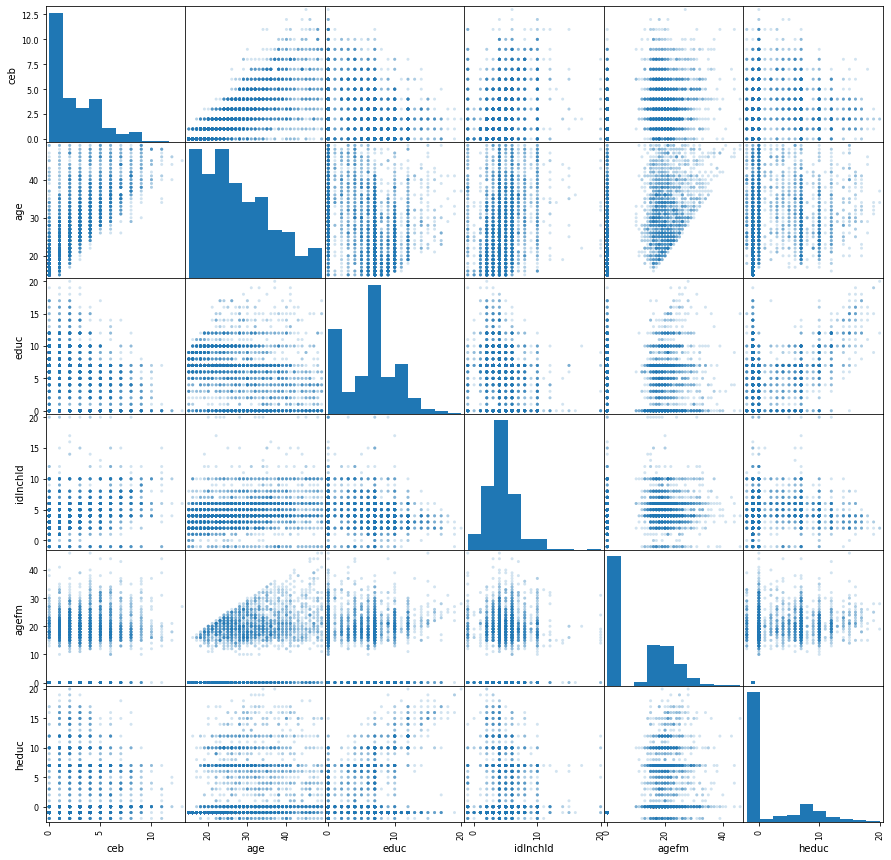

In [149]:
pd.plotting.scatter_matrix(df[['ceb', 'age', 'educ', 'idlnchld', 'agefm', "heduc"]], alpha=0.2, 
                                 figsize=(15, 15), diagonal='hist')
pylab.show()

In [150]:
df.columns

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv', 'bicycle',
       'nevermarr', 'idlnchld_noans', 'heduc_noans', 'usemeth_noans'],
      dtype='object')

In [151]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric +'\
                    'radio + tv + bicycle + nevermarr + idlnchld_noans +'\
                    'heduc_noans + usemeth_noans', 
             data=df)
fitted = m1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:30   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [152]:
print(df.religion.value_counts())

spirit        1838
other         1076
protestant     989
catholic       445
Name: religion, dtype: int64


Проверьте критерием Бройша-Пагана гомоскедастичность ошибки в построенной модели. Выполняется ли она?

In [153]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [154]:
m2 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric +'\
                    'radio + tv + bicycle + nevermarr + idlnchld_noans +'\
                    'heduc_noans + usemeth_noans', 
             data=df)
fitted = m2.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:55   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [155]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric +'\
                    'bicycle + nevermarr + idlnchld_noans +'\
                    'heduc_noans + usemeth_noans', 
             data=df)
fitted = m3.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:58:36   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [156]:
print('Breusch-Pagan test: p=%f' % sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1])

Breusch-Pagan test: p=0.000000


In [158]:
m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth +'\
                    'agefm + heduc + urban + electric +'\
                    'bicycle + nevermarr + idlnchld_noans +'\
                    'heduc_noans + usemeth_noans', 
             data=df)
fitted = m4.fit(cov_type='HC1')
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        13:59:41   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [159]:
print('F=%f, p=%f, k1=%f' % m2.fit().compare_f_test(m4.fit()))

F=0.919236, p=0.467231, k1=5.000000


Признак usemeth_noans значим по критерию Стьюдента, то есть, при его удалении модель значимо ухудшится. Но вообще-то отдельно его удалять нельзя: из-за того, что мы перекодировали пропуски в usemeth произвольно выбранным значением c_{usemeth }=-1c 
usemeth
​	
 =−1, удалять usemeth_noans и usemeth можно только вместе.

Удалите из текущей модели usemeth_noans и usemeth. Проверьте критерием Фишера гипотезу о том, что качество модели не ухудшилось. Введите номер первой значащей цифры в достигаемом уровне значимости (например, если вы получили 5.5\times10^{-8}5.5×10 
−8
 , нужно ввести 8).

Если достигаемый уровень значимости получился маленький, верните удалённые признаки; если он достаточно велик, оставьте модель без usemeth и usemeth_noans.  

In [160]:
m5 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth +'\
                    'agefm + heduc + urban + electric +'\
                    'bicycle + nevermarr + idlnchld_noans +'\
                    'heduc_noans', 
             data=df)
fitted = m5.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     611.3
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        14:02:30   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.202     -5.

In [161]:
print('F=%f, p=%.40f, k1=%f' % m4.fit().compare_f_test(m5.fit()))

F=92.890582, p=0.0000000000000000000000000000000000000003, k1=2.000000


Посмотрите на доверительные интервалы для коэффициентов итоговой модели (не забудьте использовать поправку Уайта, если есть гетероскедастичность ошибки) и выберите правильные выводы.

In [162]:
print(m4.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        14:04:30   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

   ceb  age  educ    religion  idlnchld  knowmeth  usemeth  agefm  heduc  \
0    0   18    10    catholic       4.0       1.0      1.0    0.0   -1.0   
1    2   43    11  protestant       2.0       1.0      1.0   20.0   14.0   
2    0   49     4      spirit       4.0       1.0      0.0   22.0    1.0   
3    0   24    12       other       2.0       1.0      0.0    0.0   -1.0   
4    3   32    13       other       3.0       1.0      1.0   24.0   12.0   

   urban  electric  radio   tv  bicycle  nevermarr  idlnchld_noans  \
0      1       1.0    1.0  1.0      1.0          1               0   
1      1       1.0    1.0  1.0      1.0          0               0   
2      1       1.0    1.0  0.0      0.0          0               0   
3      1       1.0    1.0  1.0      1.0          1               0   
4      1       1.0    1.0  1.0      1.0          0               0   

   heduc_noans  usemeth_noans  
0            0              0  
1            0              0  
2            0            